![](https://www.ieseg.fr/wp-content/uploads/IESEG-Logo-2012-rgb.jpg)


# Collaborative Filtering

In [1]:
# conda install -c conda-forge scikit-surprise

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import surprise # conda install -c conda-forge scikit-surprise

# Exercise 1

In [3]:
# Read dataset
amz = pd.read_csv("../Data/Amazon_Reviews_2019.csv")

# we will use this later
lookup_asin = amz.drop_duplicates(subset=["asin"], keep="last").set_index("asin")

In [4]:
# filter items with 10+ reviews
review_count = amz["asin"].value_counts()

min_count = 10
asin_filter = list(review_count[review_count >= min_count].index)
amz_filter = amz[amz['asin'].isin(asin_filter)].reset_index(drop=True)

print(f"Removed {len(review_count) - (review_count > min_count).sum()} items")

Removed 29 items


In [5]:
# filter users with 3+ reviews
review_count = amz_filter["reviewerID"].value_counts()

min_count = 3
user_filter = list(review_count[review_count >= min_count].index)
amz_filter = amz_filter[amz_filter['reviewerID'].isin(user_filter)].reset_index(drop=True)

print(f"Removed {len(review_count) - (review_count >= min_count).sum()} user")

Removed 13998 user


In [6]:
# pivot dataframe -> rows=users, columns=items, values=rating
amz_pivot = amz_filter.pivot_table(index='reviews.username', values='reviews.rating', columns='asin')
amz_pivot

asin,B00DUGZFWY,B00EEBS9O0,B00IOY8XWQ,B00IOYAM4I,B00QFQRELG,B00QWO9P0O,B00REQKWGA,B00VINDBJK,B00WRDS8H0,B00ZS0G0PG,...,B01AHBBG04,B01AHBDCKQ,B01BH83OOM,B01IO618J8,B01J94SBEY,B01J94SCAM,B01J94SWWU,B01J94T1Z2,B01J94YIT6,B06XD5YCKX
reviews.username,,,,,,,,,,,,,,,,,,,,,
1029cr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234ABC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yolo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zane1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zeke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Most values are NA

def compute_sparsity(df):
    return np.sum(np.ravel(np.isnan(df.values))) / np.ravel(df.values).shape[0]

compute_sparsity(amz_pivot)

0.9051504472756845

# Exercise 2

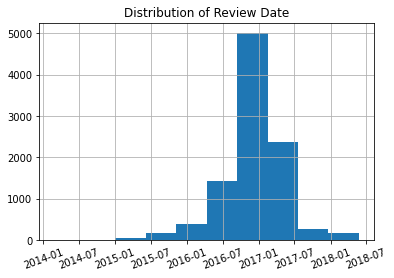

In [8]:
# convert timestamp to datetime
amz_filter["reviews.date"] = pd.to_datetime(amz_filter["reviews.date"])

amz_filter["reviews.date"].hist(xrot=20)
plt.title("Distribution of Review Date")
plt.show()

In [9]:
# split dataframe in train and test
cutoff_date = "05.01.2017" 

train = amz_filter[amz_filter['reviews.date'] < cutoff_date].reset_index(drop=True)
test = amz_filter[amz_filter['reviews.date'] >= cutoff_date].reset_index(drop=True)

<AxesSubplot:>

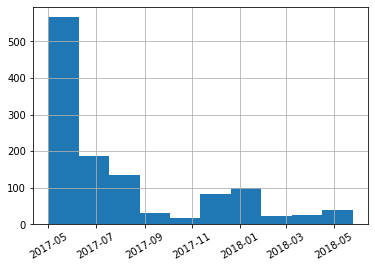

In [10]:
test['reviews.date'].hist(xrot=30)

In [11]:
# filter columns
filter_cols = ["reviews.username", "asin", "reviews.rating"]

train = train[filter_cols]
test = test[filter_cols]

In [12]:
print('------ Train ------')
print('Nr items:', len(train["asin"].unique()))
print('Nr users:', len(train["reviews.username"].unique()))

print('\n------ Test ------')
print('Nr items:', len(test["asin"].unique()))
print('Nr users:', len(test["reviews.username"].unique()))

print('\nNr new items:', len(set(test["asin"])-set(train["asin"])))
print('Nr new users:', len(set(test["reviews.username"])-set(train["reviews.username"])))

------ Train ------
Nr items: 27
Nr users: 2065

------ Test ------
Nr items: 28
Nr users: 470

Nr new items: 7
Nr new users: 105


In [13]:
from surprise import Dataset
from surprise import Reader

# set up reader with min rating and max rating as arguments
reader = Reader(rating_scale=(1, 5))

# surprise training and test set
df_train = Dataset.load_from_df(train, reader).build_full_trainset()
df_test = list(test.itertuples(index=False, name=None))

In [14]:
from surprise import KNNBasic

# set option to cosine similarity and user-based collaborative filtering
options = {'name':'cosine', 'user_based':True}

# select 20 most similar users (min 5)
ub = KNNBasic(k=20, min_k=5, sim_options=options, random_state=42)

# fit on training set
ub.fit(df_train)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [15]:
from surprise import accuracy

pred = ub.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 0.8937
Impossible: 0.5381


In [16]:
ub.default_prediction()

4.52141870105942

# Exercise 4

In [17]:
# set option to cosine similarity and user-based collaborative filtering
options = {'name':'pearson', 'user_based':False}

# select 20 most similar items (min 5)
ib = KNNBasic(k=10, min_k=2, sim_options=options, random_state=42)

# fit on training set
ib.fit(df_train)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [18]:
pred = ib.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 0.9293
Impossible: 0.6393


In [19]:
ib.default_prediction()

4.52141870105942

# Exercise 5

In [20]:
from surprise import BaselineOnly

# Select alternating least squares (ALS) and 30 epochs
options = {"method": "als", "n_epochs": 30}
als = BaselineOnly(bsl_options=options)

# fit on training set
als.fit(df_train)

pred = als.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

Estimating biases using als...
RMSE: 0.8777
Impossible: 0.0000


In [21]:
from surprise import SVD

# select 20 factors and use probabilistic matrix factorization (no bias)
svd = SVD(n_factors=20, biased=False, random_state=42)

# fit on training set
svd.fit(df_train)

pred = svd.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 1.1432
Impossible: 0.5365


In [22]:
print(als.default_prediction())
print(svd.default_prediction())

4.52141870105942
4.52141870105942


# Exercise 6

In [23]:
from surprise import CoClustering

clust = CoClustering(n_cltr_u=10, n_cltr_i=10, n_epochs=50, random_state=42)

clust.fit(df_train)

C:\Users\PE78B~1.BOR\AppData\Local\Temp/ipykernel_20976/4067302191.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  clust.fit(df_train)


In [24]:
pred = clust.test(df_test)
accuracy.rmse(pred)

# percentage impossible predictions
perc_impossible = np.sum([1 for i in pred if i.details["was_impossible"]]) / len(pred)
print(f"Impossible: {perc_impossible:.4f}")

RMSE: 0.9975
Impossible: 0.0000


In [25]:
clust.default_prediction()

4.52141870105942

# Exercise 7

In [26]:
def predict_user_topn(model, train, user, topk=15, item_col='item'):
    """
    Returns topk items for specified user.
    Return type: list

    Args[model, train, user, topk, item_col]
    model:      fitted model (surprise package)
    train:      train set used to fit model
    user:       user id
    topk:       topk items to return
    item_col:   column containing item ids 
    """

    # intermediate result dict 
    res = {item_col:[], 'pred':[], 'detail':[]}
    
    # iter through all items contained in train set
    for item in set(train[item_col]) :
        uid, iid, true_r, est, detail = model.predict(user,item)
        if detail['was_impossible']: continue
        # save to result dict
        res[item_col].append(item)
        res['pred'].append(est)
        res['detail'].append(detail)

    return list(pd.DataFrame(res).sort_values('pred', ascending=False)[:topk][item_col])

In [27]:
# Top 3 recommendations for user "Robert"

user = "Robert"
topk = 3

res = {}
for model_name, model in dict(user_based=ub, item_based=ib, als=als, svd=svd, coclustering=clust).items():
    pred = predict_user_topn(model, train, user=user, topk=topk, item_col="asin")

    # get name for each of the predicted product ids
    pred_name = [lookup_asin.loc[i]["name"] for i in pred]

    res[model_name] = pred_name

pd.DataFrame(res)

,user_based,item_based,als,svd,coclustering
0,Amazon 9W PowerFast Official OEM USB Charger a...,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon 9W PowerFast Official OEM USB Charger a...,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,..."
1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Kindle Voyage E-reader, 6 High-Resolution Disp...","Kindle Voyage E-reader, 6 High-Resolution Disp...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon Tap Smart Assistant Alexaenabled (black...
2,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",Kindle Oasis E-reader with Leather Charging Co...,"Kindle Voyage E-reader, 6 High-Resolution Disp...",Amazon Tap Smart Assistant Alexaenabled (black...,"Fire HD 8 Tablet with Alexa, 8 HD Display, 16 ..."


# Save datasets

In [28]:
amz_filter.to_csv("amz_base.csv", index=False)
train.to_csv("amz_train.csv", index=False)
test.to_csv("amz_test.csv", index=False)